# Piin arvon approksimointi Monte Carlo integroinnilla

Ympyrän pinta-ala $ A $ on

$ A = \pi*r^{2} $,

missä $ r > 0 $ on ympyrän säde. Kun $ r = 1 $ on ympyrän pinta-ala $ \pi $.

$ 1 x 1 $-neliön sisällä olevan $ \frac{1}{4} $-ympyrän ala on siis $ \frac{\pi}{4} $.

**Monte Carlo integrointi** laskee kuinka moni satunnaisesti $ 1x1 $-neliöön asetetuista pisteistä, kuuluu ympyrän kaaren rajaaman alueen sisäpuolelle. Kun pisteitä generoidaan tarpeeksi monta, saadaan suhteellisen hyvä approksimaatio $ \frac{\pi}{4} $:n arvolle.

In [1]:
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
import timeit

n = 1_000_000

## NumPyn vektorisoiduilla operaatioilla

Approximate pi: 3.139432
NumPy's value for pi: 3.141592653589793


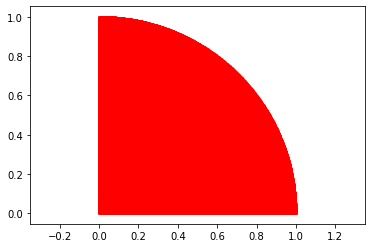

In [2]:
rng_x = RandomState(1729)
rng_y = RandomState(88)

x = rng_x.uniform(low=0, high=1, size=n)
y = rng_y.uniform(low=0, high=1, size=n)
sum_of_squares = x * x + y * y
mask = sum_of_squares < 1

pi_estimate = (len(sum_of_squares[mask]) / n) * 4
print(f"Approximate pi: {pi_estimate}")
print(f"NumPy's value for pi: {np.pi}")

plt.scatter(x[mask], y[mask], s=1, c="red")
plt.axis('equal')
plt.show()

## For-loopin avulla

In [3]:
rando = RandomState(1729)
randu = RandomState(88)
count = 0

for i in range(n):
    u = rando.uniform(low=0, high=1)
    v = randu.uniform(low=0, high=1)
    if (u * u + v * v) < 1:
        count += 1

pi_est = (count / n) * 4
print(f"Approximate pi: {pi_est}")
print(f"NumPy's value for pi: {np.pi}")

Approximate pi: 3.139432
NumPy's value for pi: 3.141592653589793


## Toteutusten ajastus timeit-kirjaston avulla

In [4]:
repeats = 10

# Setup statement executed once
setup = """\
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
import time
import timeit

n = 1_000_000
rng_x = RandomState(1729)
rng_y = RandomState(88)"""

# Actual statement executed for repeats times
vectorized_stmt = """\
x = rng_x.uniform(low=0, high=1, size=n)
y = rng_y.uniform(low=0, high=1, size=n)
sum_of_squares = x * x + y * y
mask = sum_of_squares < 1"""

vectorized_time = timeit.Timer(stmt=vectorized_stmt, setup=setup).timeit(number=repeats)
print(f"Vectorized average time over {repeats} repeats: {vectorized_time/repeats:.6f}")

# Actual statement executed for repeats times
for_stmt = """\
count = 0
for i in range(n):
    u = rng_x.uniform(low=0, high=1)
    v = rng_y.uniform(low=0, high=1)
    if (u * u + v * v) < 1:
        count += 1
"""

for_time = timeit.Timer(stmt=for_stmt, setup=setup).timeit(number=repeats)
print(f"For-loop average time over {repeats} repeats: {for_time/repeats:.6f}")


Vectorized average time over 10 repeats: 0.035540
For-loop average time over 10 repeats: 1.666104
